# Final Project

## Introduction

Welcome to my final project Jupyter Notebook. This notebook will accompany the video presentation for the project. Today, we will use the skills developed in this class to solve a supervised machine learning problem. We will use a loan default set sourced from Kaggle which contains 16 predictor demographic variables and 1 response/target variable on whether the person defaulted on their loan or not. We will begin by preprocessing the data and performing some EDA with the dataset. Then, using sklearn and the skills developed in the course we will tune and test all the model types from this course and evaluate them with a test data set. Success will be locating and presenting the best machine learning approach to predicting loan default. Solving issues such as these with high accuracy is very useful in the financial world as borrowers and lenders seek to mitigate risk in an ever evolving economy. Thank you for joining me today and I hope you enjoy my report.

### Step 1: Data Loading and Preprocessing

First we load in all our needed packages, NumPy, Pandas, Seaborn and Matplotlib for plotting and EDA, and sklearn for all our machine learning techniques.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Loading in our dataset we can see we have over 255,000 records! Because my computer struggles greatly with large datasets, we will take a sample of 2000 loans to train our data on. The dataset has roughly 90% of entries where the loan was not defaulted and because we have significant issues with balancing, we will balance the dataset ourselves for a more well rounded evaluation later on. The next 2 blocks of code load in our code and process our 2000 loan record dataset. 

In [11]:
loan = pd.read_csv("Loan_default.csv")
loan.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [12]:
loan = pd.concat([loan[loan['Default'] == 1].head(1000), loan[loan['Default'] == 0].head(1000)])

The next block displays the variables we have in the dataset. LoanID is a unique identifier, but is unnecessary for our analysis. We will drop this variable in the second code block. Now we can summarize our variables from the dataset. We have zero missing values and see 17 remaining variables. Age is the age of the borrower, income is the total annual income of the borrower, loan amount is the total principle on the loan, credit score is the borrower's credit score measured by FICO, months employed is the number of months the borrower has been employed, NumCreditLines is the number of credit lines the borrower currently has, interest rate is the annual interest rate of the loan, loan term is the length of the loan in months, DTI Ratio is the debt to income ratio for then borrower, education is the highest level of education the borrower achieved, EmploymentType is whether the person is full time or part time or unemployed, marital status is whether the borrower is married or not, HasMortgage is binary whether the person has a mortgage as well, HasDependents is a yes/no whether they have children, LoanPurpose is a categorical variable describing the purpose of the loan (home, auto, education etc.), HasCoSigner is a yes/no whether the borrower has a cosigner, and finally default is the target variable describing whether the borrower defaulted on the loan.

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2 to 1129
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          2000 non-null   object 
 1   Age             2000 non-null   int64  
 2   Income          2000 non-null   int64  
 3   LoanAmount      2000 non-null   int64  
 4   CreditScore     2000 non-null   int64  
 5   MonthsEmployed  2000 non-null   int64  
 6   NumCreditLines  2000 non-null   int64  
 7   InterestRate    2000 non-null   float64
 8   LoanTerm        2000 non-null   int64  
 9   DTIRatio        2000 non-null   float64
 10  Education       2000 non-null   object 
 11  EmploymentType  2000 non-null   object 
 12  MaritalStatus   2000 non-null   object 
 13  HasMortgage     2000 non-null   object 
 14  HasDependents   2000 non-null   object 
 15  LoanPurpose     2000 non-null   object 
 16  HasCoSigner     2000 non-null   object 
 17  Default         2000 non-null   i

In [14]:
loan = loan.drop("LoanID", axis='columns')
loan.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
5,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
8,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
11,28,149227,139759,375,56,3,5.84,36,0.80,PhD,Full-time,Divorced,No,No,Education,Yes,1
18,19,40718,78515,319,119,2,14.00,24,0.17,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1


One key part of the data preprocessing includes creating dummy variables for all the categorical variables so the sklearn models can properly access the variables. Here we can use pandas to process the categorical variables as needed.

In [15]:
Education= pd.get_dummies(loan["Education"])
EmploymentType = pd.get_dummies(loan["EmploymentType"]) 
MaritalStatus   = pd.get_dummies(loan["MaritalStatus"])
HasMortgage= pd.get_dummies(loan["HasMortgage"])
HasDependents   = pd.get_dummies(loan["HasDependents"])
LoanPurpose= pd.get_dummies(loan["LoanPurpose"])    
HasCoSigner= pd.get_dummies(loan["HasCoSigner"])
loan = loan.drop(["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"], axis='columns')
loan = pd.concat([loan, Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner], axis =1)

In [16]:
loan

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,Yes,No,Yes,Auto,Business,Education,Home,Other,No,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,1,1,0,0,0,0,1,0
5,25,90298,90448,720,18,2,22.72,24,0.10,1,...,1,1,0,0,1,0,0,0,0,1
8,36,42053,92357,827,83,1,23.94,48,0.20,1,...,1,1,0,0,0,1,0,0,1,0
11,28,149227,139759,375,56,3,5.84,36,0.80,1,...,0,1,0,0,0,1,0,0,0,1
18,19,40718,78515,319,119,2,14.00,24,0.17,1,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,28,61176,111480,580,37,4,20.43,60,0.62,0,...,0,0,1,0,0,1,0,0,1,0
1126,32,82041,121370,818,70,2,8.45,12,0.82,0,...,0,1,0,0,1,0,0,0,0,1
1127,41,79092,107796,823,39,2,16.74,24,0.54,0,...,1,0,1,0,0,0,0,1,0,1
1128,55,40115,242214,339,11,4,11.95,12,0.86,0,...,0,0,1,0,0,0,1,0,0,1


Next we can begin our visualization to get an initial idea of which variables are most important. We can see that there are many variables and it seems not all are valuable, but some that stick out are loan amount, DTI Ratio, loan purpose, and employment type. Logically these varibales all make sense, and further research in the loan market tells us that unemployment is one of the primary drivers of loan default.

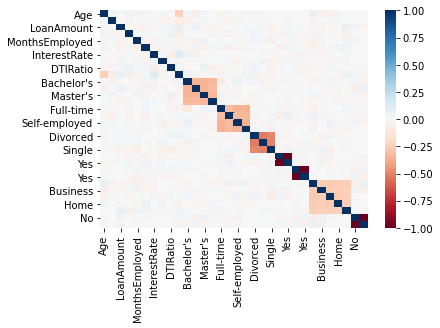

In [63]:
sns.heatmap(loan.corr(), cmap = "RdBu")

Now we create a test training split so we can properly evaluate the models we develop in the following steps. Using a seed we can recreate the split over time to ensure consistency. We will split 20% of our data for a validation/test set and use the rest to train our models.

In [18]:
x=loan.drop("Default", axis = "columns")
y=loan["Default"]

x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.2, random_state = 5)


### Model Testing and Evaluation

This next section will focus on analyzing the dataset by training our models using sklearn. We will use several classification methods learned in this class: Logistic Regression, Decision Trees, KNN, Random Forests, Boosting, and SVM. We will tune each model and then fit the trained model on the test set, comparing it to the real values and using ROC_AUC, accuracy, recall, precision, and a confusion matrix to identify the best model. The next chunks will walkthrough tuning each type of model and validating them with the discussed metrics. Please review the next code lines and join again for the discussion after this section.

In [9]:
LogReg = LogisticRegression(solver = "liblinear").fit(X = x_train, y = y_train)
preds = LogReg.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.7202537676471326
0.72
0.7438423645320197
0.7156398104265402


array([[137,  52],
       [ 60, 151]])

Decision Tree

In [10]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [11]:
dtfit = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2, min_samples_split = 10).fit(X = x_train, y = y_train)
preds = dtfit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.6487248928007221
0.6425
0.7151898734177216
0.5355450236966824


array([[144,  45],
       [ 98, 113]])

KNN

In [13]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9,11,13]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'n_neighbors': 7}

In [12]:
knnfit = KNeighborsClassifier(n_neighbors = 7).fit(X = x_train, y = y_train)
preds = knnfit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.5516687981142958
0.55
0.582010582010582
0.5213270142180095


array([[110,  79],
       [101, 110]])

Random Forest

In [23]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 300], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

KeyboardInterrupt: 

In [22]:
rffit = RandomForestClassifier(max_depth = None, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100).fit(X = x_train, y = y_train)
preds = rffit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.741580781865142
0.7425
0.7547169811320755
0.7582938388625592


array([[137,  52],
       [ 51, 160]])

AdaBoost

In [17]:
ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [14]:
adafit = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 100).fit(X = x_train, y = y_train)
preds = adafit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.7208054364452469
0.72
0.7487437185929648
0.7061611374407583


array([[139,  50],
       [ 62, 149]])

GradientBoost

In [18]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.05, 0.1, 0.5],  
    'max_depth': [2, 3, 4],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [15]:
gbfit = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 3, min_samples_leaf = 2, min_samples_split = 10, n_estimators = 100).fit(X = x_train, y = y_train)
preds = gbfit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.7263722761353094
0.725
0.7589743589743589
0.7014218009478673


array([[142,  47],
       [ 63, 148]])

SVM

In [ ]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

In [9]:
svmfit = SVC(C = 1, kernel = 'rbf', gamma = 'auto').fit(X = x_train, y = y_train)
preds = svmfit.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, preds)
print(auc(fpr,tpr))
print(metrics.accuracy_score(y_test, preds))
print(metrics.precision_score(y_test, preds))
print(metrics.recall_score(y_test, preds))
metrics.confusion_matrix(y_test, preds)

0.5
0.4725
0.0
0.0


array([[189,   0],
       [211,   0]])

### Discussion/Conclusion

As we monitor the results from above we see that the random forest model performs best out of all models. Outperforming all models in accuracy with about 74% and then having the highest ROC_AUC, precision, and recall. As we saw in class random forest are often some of the best performing models, along with boosting models, SVM, and deep learning. Because we did not study deep learning in this course, I did not apply those methods, but it would be very interesting to see the results from Neural Networks and this data. Boosting was also a strong contender, with Gradient Boosting and Ada Boost following with the second and third highest validation metrics, which agrees with our learning in class. We saw that often these models can be strong with different types of data and in this case random forests was the best approach. A curious result was one of the worst performing models was SVM, a usually well performing model. It took about 15 hours to tune the SVM model, for it to only produce a prediction of no defaults in the test set. After investigation, nothing turned up as to why this occured, but perhaps retuning the model with more data may allow for a better predictor. Because my computer could barely handle SVM on this scale to begin with, I decided to skip this further investigation until I can get a better computer. Additionally, our random forest model has strong metrics with close to 75% accuracy. Going forward, lenders and borrowers can analyze loan data to predict whether a loan default could be imminent based on the predictor variables. Then, lenders and borrowers can quickly begin mitigation techniques to save the loan and assist both parties. Our model tuned here can have huge impacts in the real world. Next steps can include computer upgrades to run the training on the entire dataset and produce a very high quality model. I am very happy with the results from this model and thank you for joining me today!